# Data Cleaning Best Practices
## Common data problems
### Data type constraints

In [2]:
import pandas as pd

ride_sharing = pd.read_csv('ride_sharing_new.csv', index_col = 0)
ride_sharing.head()

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male
1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male
2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male
3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male
4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male


In [9]:
ride_sharing.info()

ride_sharing['user_type'].describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25760 entries, 0 to 25759
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   duration         25760 non-null  object
 1   station_A_id     25760 non-null  int64 
 2   station_A_name   25760 non-null  object
 3   station_B_id     25760 non-null  int64 
 4   station_B_name   25760 non-null  object
 5   bike_id          25760 non-null  int64 
 6   user_type        25760 non-null  int64 
 7   user_birth_year  25760 non-null  int64 
 8   user_gender      25760 non-null  object
dtypes: int64(5), object(4)
memory usage: 2.0+ MB


count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64

> There are not null values. However, the user_type column has a int data type and should be converted to category. Because it represents: 1 for free riders. 2 for pay per ride. 3 for monthly subscribers.

In [13]:
# Convert user_type from integer to category
ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype('category')

# Confirming the change
assert ride_sharing['user_type_cat'].dtype == 'category'

ride_sharing['user_type_cat'].describe()

count     25760
unique        3
top           2
freq      12972
Name: user_type_cat, dtype: int64

> Done!

In [15]:
# Strip duration of minutes
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip('minutes')

# Convert duration to integer
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype('int')

# Write an assert statement making sure of conversion
assert ride_sharing['duration_time'].dtype == 'int'

ride_sharing[['duration','duration_trim','duration_time']]
ride_sharing[['duration_time']].mean()

duration_time    11.389053
dtype: float64

In [16]:
ride_sharing.head()

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,user_type_cat,duration_trim,duration_time
0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male,2,12,12
1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male,2,24,24
2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male,3,8,8
3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male,1,4,4
4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male,2,11,11


### Data range constraints

In [ ]:
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('int')

# Set all values above 27 to 27
ride_sharing.loc[ride_sharing['tire_sizes'] > 27, 'tire_sizes'] = 27

# Reconvert tire_sizes
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('category')

# Print tire size description
print(ride_sharing['tire_sizes'].describe())

In [ ]:
import datetime as dt

# Convert ride_date to date
ride_sharing['ride_dt'] = pd.to_datetime(ride_sharing['ride_date']).dt.date

today = dt.date.today()

# Set all in the future to today's date
ride_sharing.loc[ride_sharing['ride_dt'] > today, 'ride_dt'] = today

print(ride_sharing['ride_dt'].max())

### Uniqueness constraints

In [ ]:
duplicates = ride_sharing.duplicated('ride_id', keep = False)

# Sort your duplicated rides
duplicated_rides = ride_sharing[duplicates].sort_values('ride_id')

# Print relevant columns of duplicated_rides
duplicated_rides[['ride_id','duration','user_birth_year']]

In [ ]:
# Drop complete duplicates from ride_sharing
ride_dup = ride_sharing.drop_duplicates()

# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': 'min', 'duration': 'mean'}

# Group by ride_id and compute new statistics
ride_unique = ride_dup.groupby('ride_id').agg(statistics).reset_index()

# Find duplicated values again
duplicates = ride_unique.duplicated(subset = 'ride_id', keep = False)
duplicated_rides = ride_unique[duplicates == True]

assert duplicated_rides.shape[0] == 0

## Categorical data problems
### Membership constraints

In [21]:
categories_dict = {'cleanliness':  ['Clean', 'Average', 'Somewhat clean', 'Somewhat dirty', 'Dirty'],
              'safety':  ['Neutral', 'Very safe', 'Somewhat safe', 'Very unsafe', 'Somewhat unsafe'],
              'satisfaction':  ['Very satisfied', 'Neutral', 'Somewhat satisfied', 'Somewhat unsatisfied', 'Very unsatisfied'],}

categories = pd.DataFrame(categories_dict)
  
categories

,cleanliness,safety,satisfaction
0,Clean,Neutral,Very satisfied
1,Average,Very safe,Neutral
2,Somewhat clean,Somewhat safe,Somewhat satisfied
3,Somewhat dirty,Very unsafe,Somewhat unsatisfied
4,Dirty,Somewhat unsafe,Very unsatisfied


In [25]:
airlines = pd.read_csv('airlines_final.csv')
airlines.head()

,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified


In [26]:
# Print unique values of survey columns in airlines
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")
print('Safety: ', airlines['safety'].unique(), "\n")
print('Satisfaction: ', airlines['satisfaction'].unique(), "\n")

Cleanliness:  ['Clean' 'Average' 'Somewhat clean' 'Somewhat dirty' 'Dirty'] 

Safety:  ['Neutral' 'Very safe' 'Somewhat safe' 'Very unsafe' 'Somewhat unsafe'] 

Satisfaction:  ['Very satisfied' 'Neutral' 'Somewhat satsified' 'Somewhat unsatisfied'
 'Very unsatisfied'] 



In [27]:
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[cat_clean_rows])

# Print rows with consistent categories only
print(airlines[~cat_clean_rows])

Empty DataFrame
Columns: [Unnamed: 0, id, day, airline, destination, dest_region, dest_size, boarding_area, dept_time, wait_min, cleanliness, safety, satisfaction]
Index: []
      Unnamed: 0    id        day        airline        destination  \
0              0  1351    Tuesday    UNITED INTL             KANSAI   
1              1   373     Friday         ALASKA  SAN JOSE DEL CABO   
2              2  2820   Thursday          DELTA        LOS ANGELES   
3              3  1157    Tuesday      SOUTHWEST        LOS ANGELES   
4              4  2992  Wednesday       AMERICAN              MIAMI   
...          ...   ...        ...            ...                ...   
2472        2804  1475    Tuesday         ALASKA       NEW YORK-JFK   
2473        2805  2222   Thursday      SOUTHWEST            PHOENIX   
2474        2806  2684     Friday         UNITED            ORLANDO   
2475        2807  2549    Tuesday        JETBLUE         LONG BEACH   
2476        2808  2162   Saturday  CHINA EAST

### Categorical variables

In [29]:
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']


> The dest_region column has inconsistent values due to capitalization and has one value that needs to be remapped.

> The dest_size column has only inconsistent values due to leading and trailing spaces.

In [30]:
# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower()
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})
print(airlines['dest_region'].unique())

['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']


In [31]:
# Remove white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip()
print(airlines['dest_size'].unique())

['Hub' 'Small' 'Medium' 'Large']


### Creating categories and mapping

In [34]:
airlines['wait_min'].describe()

count    2477.000000
mean      166.084376
std       107.643625
min        15.000000
25%       105.000000
50%       145.000000
75%       185.000000
max      1365.000000
Name: wait_min, dtype: float64

In [35]:
airlines.day.unique()

array(['Tuesday', 'Friday', 'Thursday', 'Wednesday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

In [36]:
import numpy as np

# Ranges for categories
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

# Create wait_type column
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins = label_ranges, 
                                labels = label_names)

# Create mappings and replace
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 
            'Thursday': 'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)
airlines[['wait_type','day_week']]

,wait_type,day_week
0,medium,weekday
1,medium,weekday
2,medium,weekday
3,long,weekday
4,long,weekday
...,...,...
2472,long,weekday
2473,medium,weekday
2474,medium,weekday
2475,medium,weekday


### Cleaning text data

In [ ]:
# Replace "Dr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Dr.","")

# Replace "Mr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Mr.","")

# Replace "Miss" with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Miss","")

# Replace "Ms." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Ms.","")

# Assert that full_name has no honorifics
assert airlines['full_name'].str.contains('Ms.|Mr.|Miss|Dr.').any() == False

In [ ]:
# Store length of each row in survey_response column
resp_length = airlines['survey_response'].str.len()

# Find rows in airlines where resp_length > 40
airlines_survey = airlines[resp_length > 40]

# Assert minimum survey_response length is > 40
assert airlines_survey['survey_response'].str.len().min() > 40

# Print new survey_response column
print(airlines_survey['survey_response'])

## Advanced Data Problems
### Uniformity

In [40]:
banking = pd.read_csv('banking_dirty.csv', index_col = 0)
banking.head()

,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18
3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18


In [ ]:
# Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro'

# Convert acct_amount where it is in euro to dollars
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1

# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[acct_eu, 'acct_cur'] = 'dollar'

# Assert that only dollar currency remains
assert banking['acct_cur'].unique() == 'dollar'

In [42]:
banking['account_opened'].head()

0    02-09-18
1    28-02-19
2    25-04-18
3    07-11-17
4    14-05-18
Name: account_opened, dtype: object

In [43]:
# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce') 

# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

# Print acct_year
print(banking['acct_year'])

0     2018
1     2019
2     2018
3     2017
4     2018
      ... 
95    2018
96    2017
97    2017
98    2017
99    2017
Name: acct_year, Length: 100, dtype: object


### Cross Field Validation

In [44]:
# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis = 1) == banking['inv_amount']

# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])

Number of inconsistent investments:  8


In [84]:
import datetime as dt
banking['birth_date'] = pd.to_datetime(banking['birth_date'])

# Store today's date and find ages
today = dt.date.today()
ages_manual = today.year - banking['birth_date'].dt.year

# Find rows where age column == ages_manual
age_equ = ages_manual == banking['Age']

# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])

Number of inconsistent ages:  100


### Completeness

cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
acct_year           0
dtype: int64


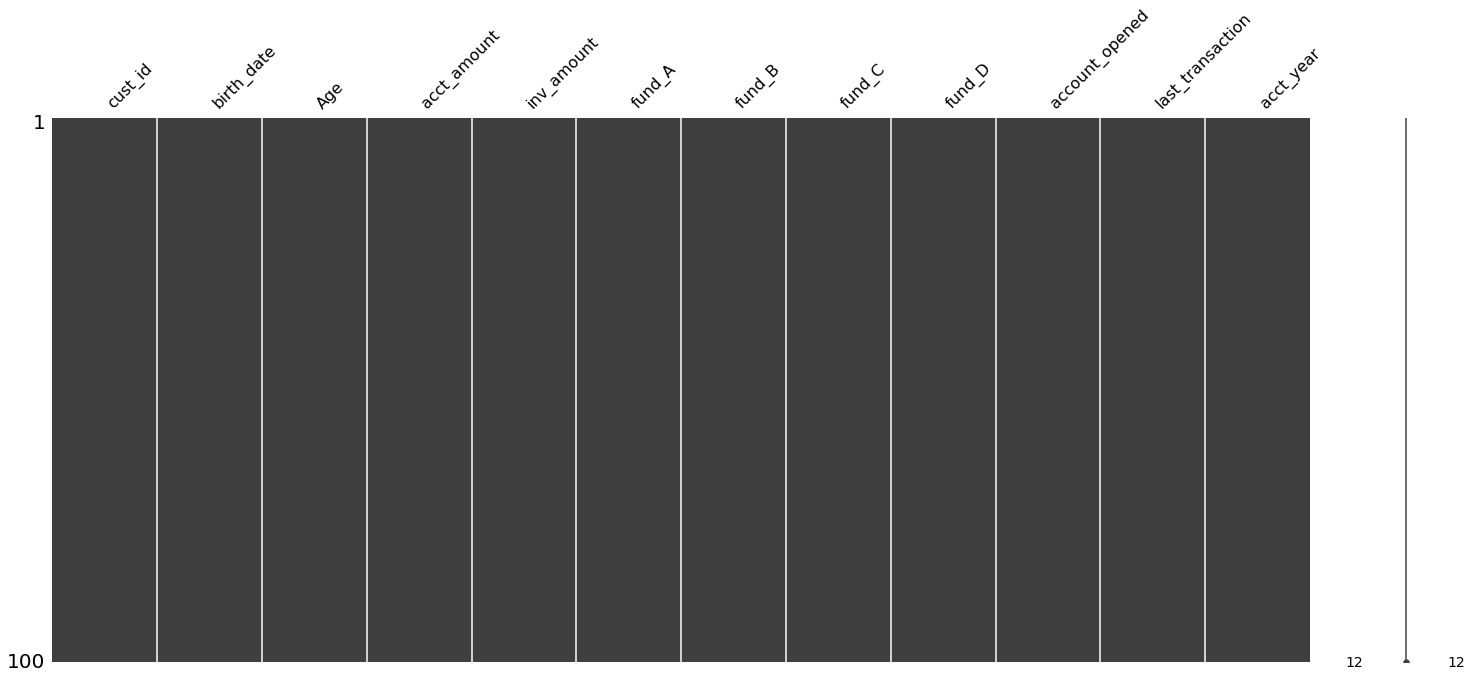

In [93]:
import matplotlib.pyplot as plt
import missingno as msno

print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()


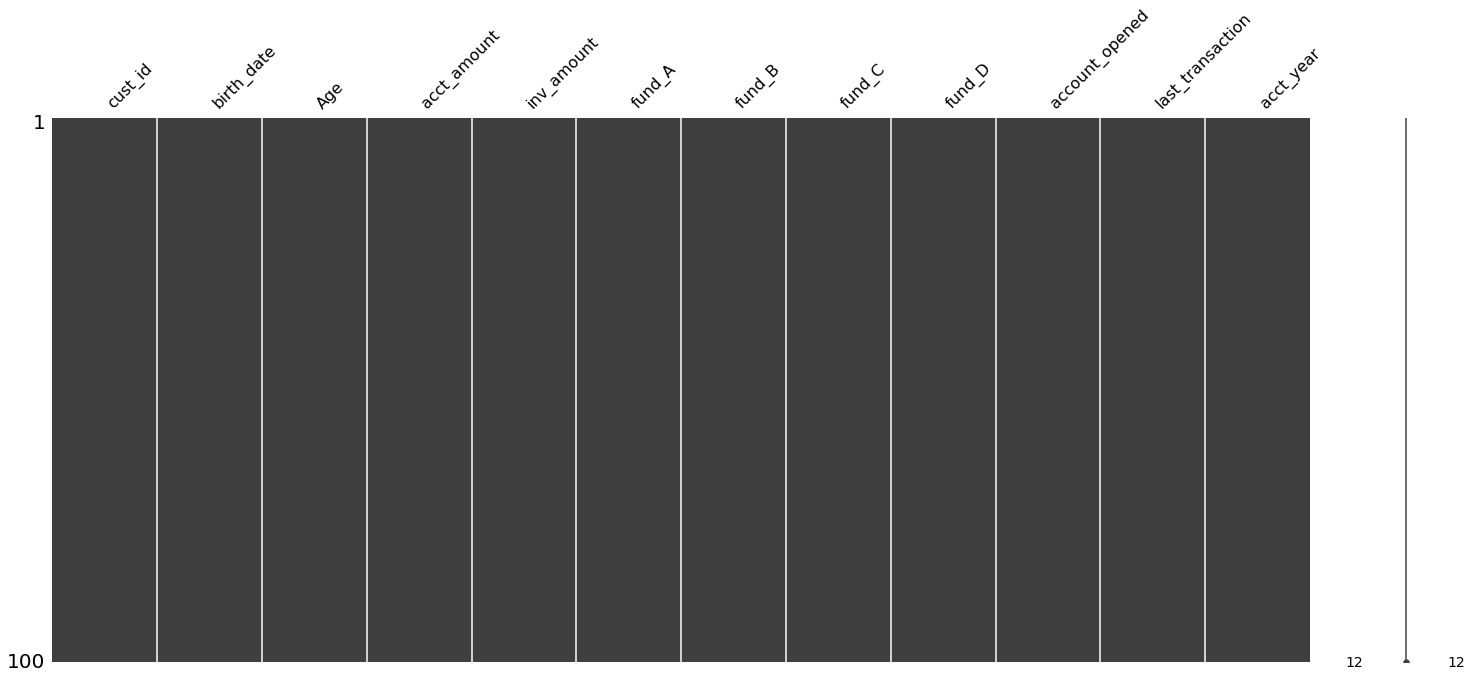

In [95]:
# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]

# Sort banking by age and visualize
banking_sorted = banking.sort_values(by='Age')
msno.matrix(banking_sorted)
plt.show()

In [96]:
# Drop missing values of cust_id
banking_fullid = banking.dropna(subset = ['cust_id'])

# Compute estimated acct_amount
acct_imp = banking_fullid['inv_amount'] * 5

# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())

cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
acct_year           0
dtype: int64


## Record linkage
### Comparing strings

In [109]:
restaurants = pd.read_csv('restaurants_L2_dirty.csv', index_col = 0)
restaurants

,name,addr,city,phone,type
0,kokomo,6333 w. third st.,la,2139330773,american
1,feenix,8358 sunset blvd. west,hollywood,2138486677,american
2,parkway,510 s. arroyo pkwy .,pasadena,8187951001,californian
3,r-23,923 e. third st.,los angeles,2136877178,japanese
4,gumbo,6333 w. third st.,la,2139330358,cajun/creole
...,...,...,...,...,...
77,feast,1949 westwood blvd.,west la,3104750400,chinese
78,mulberry,17040 ventura blvd.,encino,8189068881,pizza
79,matsuhissa,129 n. la cienega blvd.,beverly hills,3106599639,asian
80,jiraffe,502 santa monica blvd,santa monica,3109176671,californian


In [110]:
from fuzzywuzzy import process

# Store the unique values
unique_types = restaurants['type'].unique()

# Calculate similarity of 'asian' to all values of unique_types
print(process.extract('asian', unique_types, limit = len(unique_types)))

# Calculate similarity of 'american' to all values of unique_types
print(process.extract('american', unique_types, limit = len(unique_types)))

# Calculate similarity of 'italian' to all values of unique_types
print(process.extract('italian', unique_types, limit = len(unique_types)))

[('asian', 100), ('indonesian', 72), ('italian', 67), ('russian', 67), ('american', 62), ('californian', 54), ('japanese', 54), ('mexican/tex-mex', 54), ('american ( new )', 54), ('mexican', 50), ('cajun/creole', 36), ('middle eastern', 36), ('vietnamese', 36), ('pacific new wave', 36), ('fast food', 36), ('chicken', 33), ('hamburgers', 27), ('hot dogs', 26), ('coffeebar', 26), ('continental', 26), ('steakhouses', 25), ('southern/soul', 22), ('delis', 20), ('eclectic', 20), ('pizza', 20), ('health food', 19), ('diners', 18), ('coffee shops', 18), ('noodle shops', 18), ('french ( new )', 18), ('desserts', 18), ('seafood', 17), ('chinese', 17)]
[('american', 100), ('american ( new )', 90), ('mexican', 80), ('mexican/tex-mex', 68), ('asian', 62), ('italian', 53), ('russian', 53), ('middle eastern', 51), ('pacific new wave', 45), ('hamburgers', 44), ('indonesian', 44), ('chicken', 40), ('southern/soul', 39), ('japanese', 38), ('eclectic', 38), ('delis', 36), ('pizza', 36), ('cajun/creole',

In [114]:
matches = process.extract('italian', restaurants['type'], limit=len(restaurants.type))

# Iterate through the list of matches to italian
for match in matches:
  # Check whether the similarity score is greater than or equal to 80
  if match[1] >= 80:
    # Select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
    restaurants.loc[restaurants['type'] == match[0],'type'] = 'italian'

restaurants[restaurants['type'] == 'italian']

,name,addr,city,phone,type
14,bruno's,3838 centinela ave.,mar vista,3103975703,italian
21,valentina,3115 pico blvd.,santa monica,3108294313,italian
47,felicia,243 e. 58th st.,new york,2127581479,italian
57,carrmine's,2450 broadway between 90th and 91st sts .,new york,2123622200,italian
73,locanda venetta,3rd st.,los angeles,3102741893,italian
75,rex il ristoranti,617 s. olive st.,los angeles,2136272300,italian
76,don,1136 westwood blvd.,westwood,3102091422,italian


In [115]:
categories = ['italian', 'asian', 'american']

# Iterate through categories
for cuisine in categories:  
  # Create a list of matches, comparing cuisine with the cuisine_type column
  matches = process.extract(cuisine, restaurants['type'], limit=len(restaurants.type))

  # Iterate through the list of matches
  for match in matches:
     # Check whether the similarity score is greater than or equal to 80
    if match[1] >= 80:
      # If it is, select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
      restaurants.loc[restaurants['type'] == match[0]] = cuisine

# Inspect the final result
restaurants['type'].unique()

array(['american', 'californian', 'japanese', 'cajun/creole', 'hot dogs',
       'diners', 'delis', 'hamburgers', 'seafood', 'italian',
       'coffee shops', 'russian', 'steakhouses', 'mexican/tex-mex',
       'noodle shops', 'middle eastern', 'asian', 'vietnamese',
       'health food', 'pacific new wave', 'indonesian', 'eclectic',
       'chicken', 'fast food', 'southern/soul', 'coffeebar',
       'continental', 'french ( new )', 'desserts', 'chinese', 'pizza'],
      dtype=object)

In [122]:
restaurants.type.value_counts()

american            24
italian              7
californian          5
coffee shops         5
asian                4
hot dogs             3
delis                3
hamburgers           3
diners               3
seafood              2
pacific new wave     2
noodle shops         2
chinese              1
fast food            1
southern/soul        1
continental          1
coffeebar            1
french ( new )       1
eclectic             1
desserts             1
chicken              1
middle eastern       1
indonesian           1
health food          1
vietnamese           1
mexican/tex-mex      1
steakhouses          1
russian              1
cajun/creole         1
japanese             1
pizza                1
Name: type, dtype: int64

### Generating pairs and Linking DataFrames

In [129]:
import recordlinkage

restaurants_new = pd.read_csv('restaurants_L2.csv', index_col=0)

# Create an indexer and object and find possible pairs
indexer = recordlinkage.Index()

# Block pairing on cuisine_type
indexer.block('type')

# Generate pairs
pairs = indexer.index(restaurants, restaurants_new)

In [139]:
# Create a comparison object
comp_cl = recordlinkage.Compare()

# Find exact matches on city, cuisine_types 
comp_cl.exact('city', 'city', label='city')
comp_cl.exact('type', 'type', label = 'type')

# Find similar matches of rest_name
comp_cl.string('name', 'name', label='name', threshold=0.8) 

# Get potential matches
potential_matches = comp_cl.compute(pairs, restaurants, restaurants_new)
potential_matches

city  type  name
0  0       0     1   0.0
   1       0     1   0.0
   2       0     1   0.0
   3       0     1   0.0
   4       0     1   0.0
...      ...   ...   ...
55 221     1     1   0.0
   230     1     1   0.0
   233     1     1   0.0
   238     1     1   0.0
   241     1     1   0.0

[4152 rows x 3 columns]

In [134]:
# Finding the only pairs we want
matches = potential_matches[potential_matches.sum(axis = 1) >= 3]
matches

,,city,type,name
55,15,1,1,1.0


In [138]:
# Isolate potential matches with row sum >=3
matches = potential_matches[potential_matches.sum(axis = 1) >= 3]

# Get values of second column index of matches
matching_indices = matches.index.get_level_values(1)

# Subset restaurants_new based on non-duplicate values
non_dup = restaurants_new[~restaurants_new.index.isin(matching_indices)]

# Append non_dup to restaurants
full_restaurants = restaurants.append(non_dup)
full_restaurants

/var/folders/4n/dll6nv094h5fm4m2lhzkmtd40000gn/T/ipykernel_4143/1109426136.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_restaurants = restaurants.append(non_dup)


,name,addr,city,phone,type
0,american,american,american,american,american
1,american,american,american,american,american
2,parkway,510 s. arroyo pkwy .,pasadena,8187951001,californian
3,r-23,923 e. third st.,los angeles,2136877178,japanese
4,gumbo,6333 w. third st.,la,2139330358,cajun/creole
...,...,...,...,...,...
331,vivande porta via,2125 fillmore st.,san francisco,4153464430,italian
332,vivande ristorante,670 golden gate ave.,san francisco,4156739245,italian
333,world wrapps,2257 chestnut st.,san francisco,4155639727,american
334,wu kong,101 spear st.,san francisco,4159579300,asian
